<div style="font-size: 200%; font-weight: bold; color: maroon;">302__Logistic_Regression_Digits_Dataset</div>


### Importing dataset from scikit-learn

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Let's check description of the dataset

print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


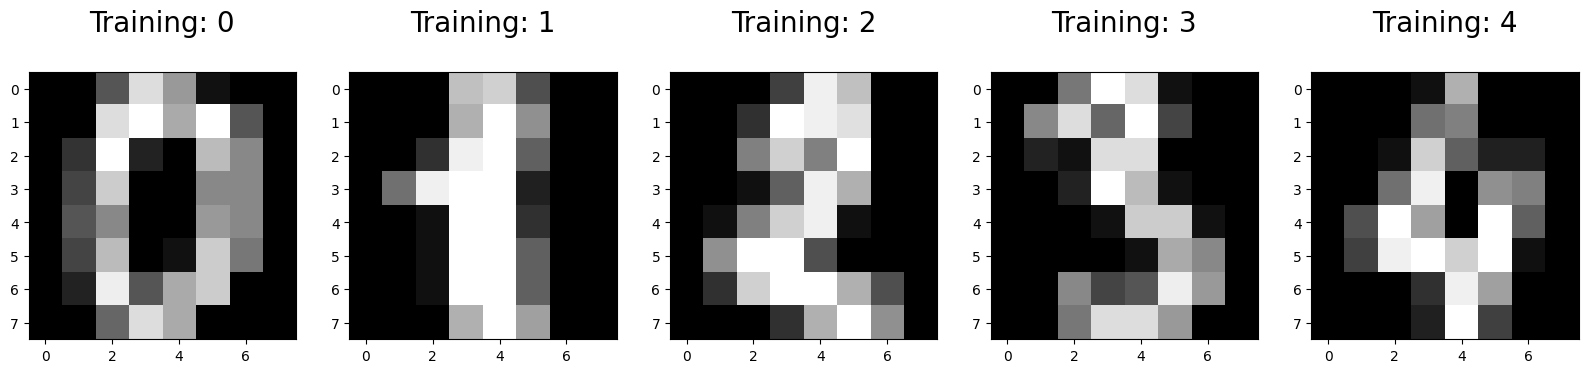

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


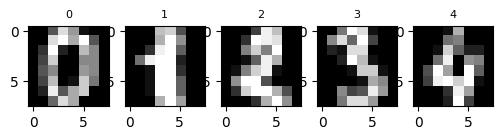

In [5]:
plt.figure(figsize=(6,3))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize = 8)


# YOUR TASK #1: 
## Splitting Data into Training (75%) and Test Sets 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=50)

# X_train contains 75% of total dataset
print(X_train.shape)
print(y_train.shape)
# X_test contains 25% of total dataset
print(X_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


# YOUR TASK #2:
## Implement and make an instance of LogisticRegression (that is the scikit name)
## Follow the 5 standard ML methodology steps below

## Step 1. Import the model you want to use

In [9]:
from sklearn.linear_model import LogisticRegression

## Step 2. Make an instance of the Model

In [10]:
logistic_reg = LogisticRegression(max_iter = 10000)

In [11]:
print(logistic_reg)

LogisticRegression(max_iter=10000)


## Step 3. Training the model on the data, storing the information learned from the data

In [12]:
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [13]:
logistic_reg.intercept_

array([ 4.0023585 , -9.96388904, -3.53269234, -1.23870539, 13.26129812,
       -7.19429564,  3.93364477,  5.45889565,  3.60378456, -8.33039922])

In [14]:
logistic_reg.coef_

array([[ 0.00000000e+00, -3.91144201e-03, -1.49738017e-03,
        -4.48553265e-02,  4.40906791e-02, -8.21383626e-02,
        -1.19737232e-01, -1.09930616e-02, -7.03291376e-07,
        -1.52525986e-02,  1.43299917e-04,  1.58041287e-01,
         2.18123573e-02,  4.21931564e-02, -6.73395376e-02,
        -6.77938946e-03, -3.19199664e-03,  1.98477831e-02,
         1.08516633e-01, -2.53979425e-02, -3.07301746e-01,
         1.63015497e-01,  1.89860813e-02, -1.27634826e-04,
        -1.59582243e-03,  1.03382666e-01,  3.34315198e-02,
        -1.63501590e-01, -3.39081098e-01, -4.75345251e-02,
         1.13100823e-01, -6.29264667e-06,  0.00000000e+00,
         1.75431468e-01,  6.59225949e-02, -1.78785818e-01,
        -2.94931941e-01,  3.79826241e-02,  9.14133434e-02,
         0.00000000e+00, -1.70584562e-05, -1.02370134e-02,
         1.73543348e-01, -1.24101102e-01, -1.34001319e-01,
         6.29627385e-02,  8.41430540e-02, -1.50225269e-05,
        -5.37439226e-05, -3.52874761e-02,  2.04359468e-0

## Step 4. Predict labels for new data (new images)

NOTE: to make the prediction on one single element, use .reshape(1, -1)

This converts a numpy matrix output into a single scalar:
https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [15]:
predictions = logistic_reg.predict(X_test)
print(predictions)

[8 3 7 6 2 0 4 1 9 7 4 6 1 2 6 6 3 6 9 9 0 0 8 2 0 2 7 4 0 7 6 5 3 0 1 2 1
 6 4 3 0 2 0 5 4 6 8 9 7 5 9 5 7 5 8 6 4 0 8 5 5 9 0 1 1 8 9 8 1 1 9 9 5 5
 7 0 2 1 4 3 5 6 7 1 4 8 2 3 4 1 8 1 9 7 4 2 1 4 9 3 9 0 4 6 6 6 2 0 3 0 3
 5 2 0 2 4 9 0 6 9 2 5 2 3 7 6 4 3 0 9 8 9 8 7 7 5 0 9 8 1 1 5 9 7 9 9 6 9
 0 8 7 0 9 2 3 8 5 9 2 8 0 0 5 3 9 2 9 2 2 2 4 6 9 2 4 3 7 8 2 1 7 9 2 4 1
 7 2 4 6 6 6 0 9 0 6 1 7 7 7 0 3 5 6 8 9 9 1 3 7 1 7 4 6 2 2 4 2 0 0 1 6 5
 8 1 0 4 2 8 1 5 4 6 8 9 1 8 1 0 2 7 0 7 5 8 7 0 9 3 0 6 3 2 9 2 2 1 0 9 1
 8 6 5 0 1 4 6 1 5 9 8 6 6 5 0 1 6 6 5 9 2 2 9 4 3 1 9 9 8 2 3 5 8 9 7 7 7
 7 7 3 5 2 1 2 2 3 2 7 1 1 5 5 3 4 1 4 1 0 2 2 0 2 7 1 4 6 7 3 1 8 1 0 1 9
 6 3 3 0 9 5 4 9 8 6 7 2 6 2 1 6 5 7 6 0 9 2 7 4 1 4 0 0 0 5 1 5 2 6 7 0 7
 3 5 0 8 8 0 6 5 6 8 9 5 8 4 1 4 6 0 3 6 9 8 5 3 9 5 7 4 0 6 5 8 0 5 0 7 7
 5 6 6 4 3 1 6 9 2 5 8 8 3 9 4 1 4 9 4 6 2 8 9 3 5 7 7 1 4 0 1 6 8 0 7 8 7
 4 3 9 6 7 7]


## Step 5. Make predictions on entire test data and measure Model Performance

In [16]:
score = logistic_reg.score(X_test, y_test)
print(score)

0.9622222222222222


## Another essential performance measure: Confusion Matrix

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[52  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  1  0  0  0  3  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  1  0  2  0  1]
 [ 0  1  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 40  1  0  0  2]
 [ 0  0  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  1  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  1 48]]


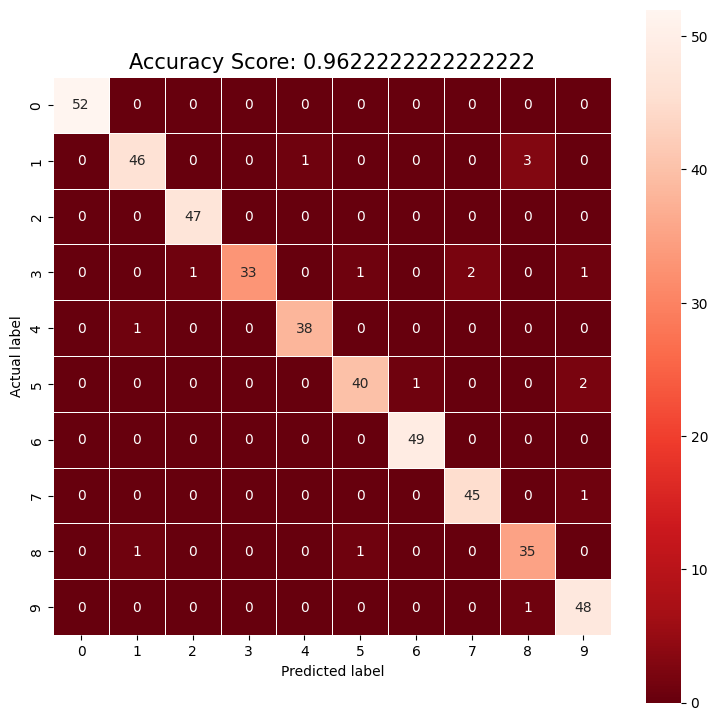

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, 
            fmt=".0f", 
            linewidths=.5, 
            square = True, 
            cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);